In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection

%matplotlib inline

In [2]:
df = pd.read_pickle('../input/processed_train_data.pickle')
df.dropna(subset=['MA200'], inplace=True)

In [3]:
X = np.array(df.drop(['game_date','shot_id','shot_made_flag'], axis=1))
y = np.array(df['shot_made_flag'])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20430, 192)
(20430,)
(5108, 192)
(5108,)


In [5]:
from sklearn.metrics import roc_curve, auc

def draw_roc(models,X,y):
    plt.figure(figsize=(10,10))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    for name,model in models:
        model.fit(X_train,y_train)
        fpr,tpr,threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc_value = auc(fpr,tpr)
        plt.plot(fpr,tpr,label=name + ' (AUC = %.2f)' % auc_value)
        
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate \n (1 - Specificity)')
    plt.ylabel('True Positive Rate \n (Sensitivity)')
    plt.title('ROC Curves')
    plt.legend(loc='lower right')
    plt.show()

C:\Users\guillaume\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


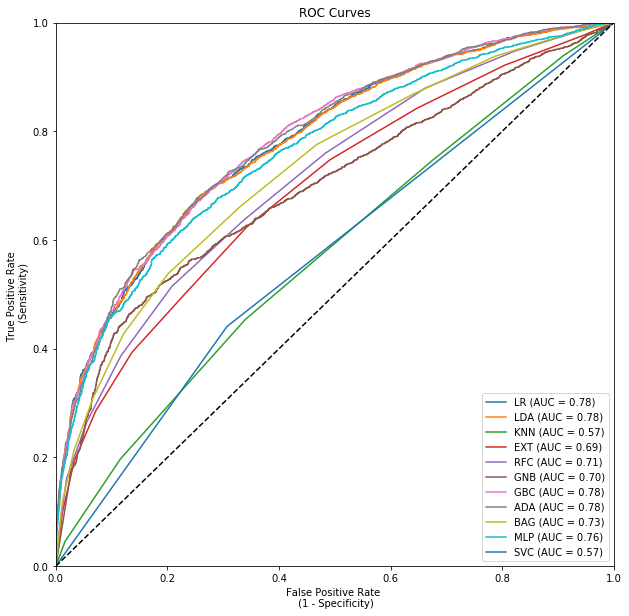

In [6]:
plt.figure(figsize=(10,10))

models = [('LR', LogisticRegression()),
          ('LDA', LinearDiscriminantAnalysis()),
          ('KNN', KNeighborsClassifier()),
          ('EXT', ExtraTreesClassifier()),
          ('RFC', RandomForestClassifier()),
          ('GNB', GaussianNB()),
          ('GBC', GradientBoostingClassifier()),
          ('ADA', AdaBoostClassifier()),
          ('BAG', BaggingClassifier()),
          ('MLP', MLPClassifier())
          ]

# we didn't define a base estimator for AdaBoostClassifier and BaggingClassifier. 
# They will use the default one (decision tree)

for name,model in models:
    model.fit(X_train, y_train)
    fpr,tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc_value = auc(fpr,tpr)
    plt.plot(fpr, tpr, label=name + ' (AUC = %.2f)' % auc_value)

# some models do proba prediction differently
svm = SVC(probability=True)
svm.fit(X_train, y_train)
fpr,tpr, threshold = roc_curve(y_test, svm.predict(X_test))
auc_value = auc(fpr,tpr)
plt.plot(fpr, tpr, label='SVC (AUC = %.2f)' % auc_value)

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate \n (1 - Specificity)')
plt.ylabel('True Positive Rate \n (Sensitivity)')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

In [ ]:
models = [
    ('LR', AdaBoostClassifier(base_estimator=LogisticRegression())),
    ('EXT', AdaBoostClassifier(base_estimator=ExtraTreesClassifier())),
    ('RFC', AdaBoostClassifier(base_estimator=RandomForestClassifier())),
    ('GNB', AdaBoostClassifier(base_estimator=GaussianNB()))
]

plt.figure(figsize=(10,10))

for name,model in models:
    model.fit(X_train, y_train)
    fpr,tpr, threshold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc_value = auc(fpr,tpr)
    plt.plot(fpr, tpr, label=name + ' (AUC = %.2f)' % auc_value)
    
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate \n (1 - Specificity)')
plt.ylabel('True Positive Rate \n (Sensitivity)')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()